<a href="https://colab.research.google.com/github/arewadataScience/ArewaDS-Deep-Learning/blob/main/Part_1_Deep_Learning_with_Pytorch/week2/week_2_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Arewa DataScience Academy
### Deep Learning Cohort 1.0

### WEEK 2 Exercises

### Exercises:
Please, see week 2 exercises from [**Learn PyTorch for Deep Learning**: 01. Pytorch Workflows](https://www.learnpytorch.io/01_pytorch_workflow/#exercises)

### Additional Exercise
[Click to view PDF 📄](ArewaDS_Deep_Learning_Advanced_Assignment_Week2.pdf)

SUBMIT ASSIGNMENT HERE: [CLICK ME ▶️](https://forms.gle/876vi4aNoFf4A2mU7)

**Question** **1**

In [14]:
# Importing libraries
import torch
import matplotlib.pyplot as plt
from torch import nn


#Setup CPU or GPU
#device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [3]:
# Creating parameters for data
weight = 0.3
bias = 0.9

X = torch.arange(0,1,0.01).unsqueeze(dim = 1)
y = weight * X + bias
print(f"X Samples: {len(X)}")
print(f"y Samples: {len(y)}")
print(f"Fist 10 X & y sample:\n: {X[:10]}\ny: {y[:10]}")

X Samples: 100
y Samples: 100
Fist 10 X & y sample:
: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [4]:
# Split into training set and testing set
train_split = int(len(X) * 0.8)
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

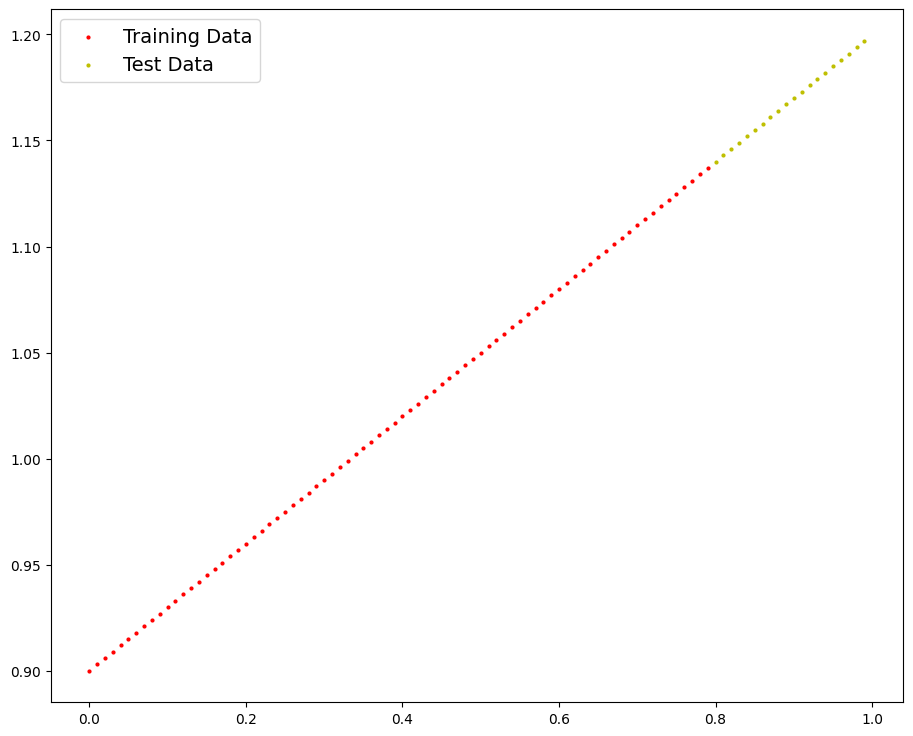

In [5]:
# Plot the training and testing data
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
  plt.figure(figsize = (11,9))
  plt.scatter(train_data,train_labels,c = 'r',s = 4, label = 'Training Data')
  plt.scatter(test_data,test_labels,c = 'y',s = 4, label = 'Test Data')

  if predictions is not None:
    plt.scatter(test_data,predictions,c = 'b', s = 4,label = 'Predictions')
  plt.legend(prop = {"size" : 14})
plot_predictions()

Question 2

In [7]:
# Linear Regression Model using nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features =1,
                                  out_features= 1)
  def forward(self,x : torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1,model_1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [8]:
next(model_1.parameters()).device

device(type='cpu')

Question 3

In [10]:
# Create Loss Function
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [17]:
# Train model 300 epochs
torch.manual_seed(42)

epochs = 300

# Set Data to device
X_train = X_train
X_test = X_test
y_train = y_train
y_test = y_test

#Training

for epoch in range(epochs):

  model_1.train()

  # forward
  y_pred = model_1(X_train)

  # loss
  loss = loss_fn(y_pred,y_train)

  # optimizer
  optimizer.zero_grad()

  #Backpropagation
  loss.backward()

  #Stepping optimizer
  optimizer.step()

  # Testing every 20 epochs
  if epoch % 20 == 0:
    model_1.eval()
    with torch.inference_mode():
      # Forward
      y_preds = model_1(X_test)
      #loss
      test_loss = loss_fn(y_preds,y_test)
      #print
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.128 | Test loss: 0.337
Epoch: 20 | Train loss: 0.082 | Test loss: 0.218
Epoch: 40 | Train loss: 0.072 | Test loss: 0.175
Epoch: 60 | Train loss: 0.065 | Test loss: 0.153
Epoch: 80 | Train loss: 0.058 | Test loss: 0.137
Epoch: 100 | Train loss: 0.051 | Test loss: 0.121
Epoch: 120 | Train loss: 0.045 | Test loss: 0.104
Epoch: 140 | Train loss: 0.038 | Test loss: 0.088
Epoch: 160 | Train loss: 0.031 | Test loss: 0.072
Epoch: 180 | Train loss: 0.024 | Test loss: 0.056
Epoch: 200 | Train loss: 0.017 | Test loss: 0.040
Epoch: 220 | Train loss: 0.010 | Test loss: 0.024
Epoch: 240 | Train loss: 0.003 | Test loss: 0.007
Epoch: 260 | Train loss: 0.008 | Test loss: 0.007
Epoch: 280 | Train loss: 0.008 | Test loss: 0.007


Question 4

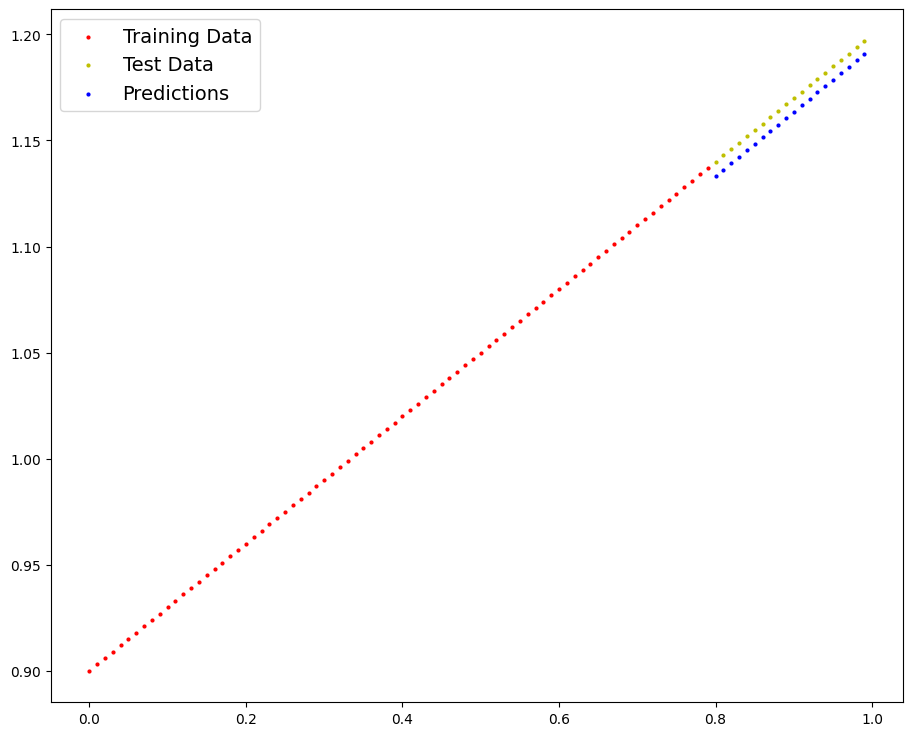

In [18]:
# Making Predictions

model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)
plot_predictions(predictions = y_preds)

In [19]:
from pathlib import Path

#Create directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
# Save path
MODEL_NAME = "exercise_pytorch_model"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#Save model
torch.save(obj = model_1.state_dict(),
           f = MODEL_SAVE_PATH)

In [20]:
#Create nes model instance
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))
loaded_model

<ipython-input-20-859f8dc35f61>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [22]:
# making predictions
y_preds_new = loaded_model(X_test)
y_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])